<a href="https://colab.research.google.com/github/yfhkucing/regression_bms/blob/master/data_reshape_and_training_temp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import pandas as pd
import numpy as np

In [57]:
df=pd.read_excel('data_big.xlsx',sheet_name='Sheet2')

In [31]:
#df

In [58]:
df=df.drop(['source','ACH_jendela','ACH_fan','ACH_total'],axis=1)
#df=df.drop(['source'],axis=1)

In [59]:
#df=(df-df.min())/(df.max()-df.min())
df.head()

,koor_x,koor_y,koor_z,Vx,Vy,Vz,Temp,Jendela,AC,sudut angin,Nilai Kecepatan Angin,Dry Bulb Temperature,Fan 1,Fan 2,Fan 3
0,1,6,18,0.003601,-0.061728,0.013407,27.235806,0,0,171,0.5,27.0,0,0,0
1,1,16,18,0.003154,-0.069276,0.003700,27.362558,0,0,171,0.5,27.0,0,0,0
2,1,30,18,0.002399,-0.073255,-0.000751,27.417225,0,0,171,0.5,27.0,0,0,0
3,1,45,18,0.002273,-0.074632,-0.001710,27.410238,0,0,171,0.5,27.0,0,0,0
4,1,63,18,0.002269,-0.075449,-0.001600,27.366829,0,0,171,0.5,27.0,0,0,0


In [60]:
array_x = []

for i in range(154):
  frame= df[i::154]
  frame = frame.drop(['koor_x','koor_y','koor_z'],axis=1)
  frame = frame.drop(['Vx','Vy','Vz','Temp'],axis=1)
  #frame = frame.drop(['Temp'],axis=1)
  array_x.append(frame)

In [61]:
array_y = []

for i in range(154):
  frame= df[i::154]
  frame = frame.drop(['koor_x','koor_y','koor_z',],axis=1)
  #frame = frame.drop(['ACH_jendela','ACH_fan','ACH_total','Jendela','AC','sudut angin','Nilai Kecepatan Angin','Dry Bulb Temperature','Fan 1','Fan 2','Fan 3'],axis=1)
  #frame = frame.drop(['Jendela','AC','sudut angin','Nilai Kecepatan Angin','Dry Bulb Temperature','Fan 1','Fan 2','Fan 3'],axis=1)
  frame = frame.drop(['Vx','Vy','Vz','Jendela','AC','sudut angin','Nilai Kecepatan Angin','Dry Bulb Temperature','Fan 1','Fan 2','Fan 3'],axis=1)
  array_y.append(frame)

In [62]:
array_x[0]

,Jendela,AC,sudut angin,Nilai Kecepatan Angin,Dry Bulb Temperature,Fan 1,Fan 2,Fan 3
0,0,0,171,0.5,27.0,0,0,0
154,0,0,153,0.4,31.5,0,0,0
308,0,0,47,4.8,33.1,0,0,0
462,0,0,62,4.1,27.4,0,0,0
616,0,0,341,3.8,30.6,0,0,0
...,...,...,...,...,...,...,...,...
28798,1,1,163,0.9,31.4,1,1,1
28952,1,1,210,0.1,31.3,1,1,1
29106,1,1,247,0.3,26.7,1,1,1
29260,1,1,265,1.0,28.1,1,1,1


In [63]:
array_y[0]

,Temp
0,27.235806
154,28.468842
308,28.214651
462,27.590841
616,27.590750
...,...
28798,25.379189
28952,25.000307
29106,22.845173
29260,23.877037


In [64]:
! mkdir models
y_testing = []

import joblib
from sklearn.linear_model import LinearRegression

#model
from sklearn.svm import SVR
from sklearn.linear_model import Lasso, LogisticRegression, Ridge, ElasticNet,LassoLars
from sklearn.ensemble import RandomForestRegressor

#preprocessing and metric
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

for i in range(154):
  x = np.array(array_x[i])
  y = np.array(array_y[i])
  x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.15, random_state= 10)
  y_testing.append(y_test)
  #fitting
  regressor = LassoLars(alpha=0.5, normalize=False)
  regressor.fit(x_train,y_train)
  joblib.dump(regressor,f'/content/models/model {i}',)

mkdir: cannot create directory ‘models’: File exists


In [65]:
skor_r2=[]
mae_=[]
rmse = []
y_predict = []
for i in range(154):
  model = joblib.load(f'/content/models/model {i}')
  y_pred = model.predict(x_test)
  Skor_r2 = r2(y_test,y_pred)
  RMSE = mse(y_test,y_pred,squared=False)
  MAE = mae(y_test,y_pred)
  y_predict.append(y_pred)
  skor_r2.append(Skor_r2)
  mae_.append(MAE)
  rmse.append(RMSE)

In [66]:
skor_r2 = np.array(skor_r2)
rmse = np.array(rmse)
mae_=np.array(mae_)
y_predict = np.array(y_predict)
y_testing = np.array(y_testing)

In [67]:
skor_r2.shape, rmse.shape, y_predict.shape, y_testing.shape

((154,), (154,), (154, 29), (154, 29, 1))

In [68]:
r2_matrix = skor_r2.reshape(11,14)
rmse_matrix = rmse.reshape(11,14)
mae_matrix = mae_.reshape(11,14)

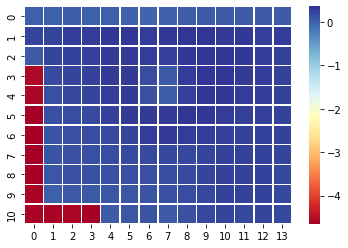

In [69]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

ax = sns.heatmap(r2_matrix, linewidth=0.5, cmap="RdYlBu")
plt.show()

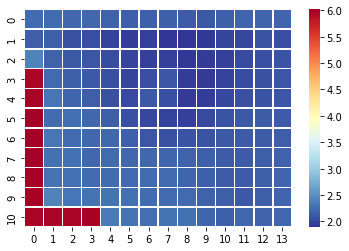

In [70]:
bx = sns.heatmap(mae_matrix, linewidth=0.5, cmap="RdYlBu_r")
plt.show()

In [71]:
scenarios = 2  #0-28
indexing = 0    #0-3 (Vx,Vy,Vz,temp)

In [72]:
a = y_testing[(...,scenarios,indexing)]
#b = y_predict[(...,scenarios,indexing)]
b = y_predict[...,scenarios]
a = np.array(a)
b = np.array(b)
a = a.reshape(11,14)
b = b.reshape(11,14)
print('reshaped')

reshaped


In [73]:
b.shape

(11, 14)

In [74]:
a.shape

(11, 14)

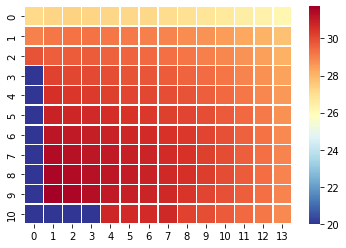

In [75]:
bx = sns.heatmap(a, linewidth=0.5, cmap="RdYlBu_r")
plt.show()

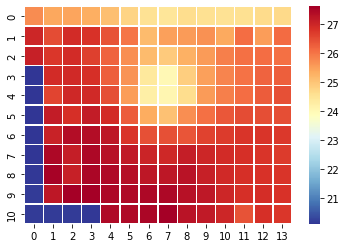

In [76]:
bx = sns.heatmap(b, linewidth=0.5, cmap="RdYlBu_r")
plt.show()

In [77]:
df_koor_x = pd.DataFrame(df['koor_x'])
df_koor_y = pd.DataFrame(df['koor_y'])
df_koor = df_koor_x.join(df_koor_y)

In [78]:
def kec_angin(y):
  df_y = pd.DataFrame(y[...,scenarios,0])
  df_z = pd.DataFrame(y[...,scenarios,1])
  df_z.rename(columns={0:1},inplace=True)
  df_y = df_y.join(df_z)
  df_y = df_y.join(df_koor)
  df_y.rename(columns={0:'Vx',1:'Vy'},inplace=True)
  return df_y

In [79]:
def tampilan_vektor(Y):
  x = np.array(Y['koor_x'])
  y = np.array(Y['koor_y'])
  u = np.array(Y['Vx'])
  v = np.array(Y['Vy'])
  plt.quiver(x,y,u,v)

In [81]:
!zip -r /content/models.zip /content/models

  adding: content/models/ (stored 0%)
  adding: content/models/model 105 (deflated 41%)
  adding: content/models/model 117 (deflated 41%)
  adding: content/models/model 24 (deflated 40%)
  adding: content/models/model 6 (deflated 40%)
  adding: content/models/model 18 (deflated 41%)
  adding: content/models/model 73 (deflated 41%)
  adding: content/models/model 88 (deflated 41%)
  adding: content/models/model 46 (deflated 41%)
  adding: content/models/model 26 (deflated 41%)
  adding: content/models/model 80 (deflated 41%)
  adding: content/models/model 23 (deflated 41%)
  adding: content/models/model 79 (deflated 41%)
  adding: content/models/model 147 (deflated 41%)
  adding: content/models/model 81 (deflated 40%)
  adding: content/models/model 121 (deflated 41%)
  adding: content/models/model 114 (deflated 41%)
  adding: content/models/model 77 (deflated 41%)
  adding: content/models/model 125 (deflated 41%)
  adding: content/models/model 106 (deflated 41%)
  adding: content/models/

In [55]:
#bismillah wisuda awal tahun depan amiin :)